<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/DolBaKi/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/8-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###합성곱 신경망 CNN
 * CNN은 이미지나 영상에서 많이 사용된다.

 * 풀링 : 합성곱 층에서 만든 특성 맵의 가로세로 크기 줄이는 역할 수행하나 특성 맵의 개수 줄이지 않음
  * 최대 풀링 : 풀링 수행시 최대값을 고름
  * 평균 풀링 : 풀링 수행시 평균값을 고름

 * 어떤 식으로 내가 필터를 써서 결과값을 도출해낼지

  라인이냐 넓이냐

In [ ]:
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2023-04-09 06:19:12--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2023-04-09 06:19:13--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4046712 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5’

best-cnn-model.h5   100%[===================>]   3.86M  --.-KB/s    in 0.07s   

2023-04-09 06:19:13 (53.9 MB/s) - ‘best-cnn-model.h5’ saved [4046712/4046712]



In [ ]:
from tensorflow import keras
model=keras.models.load_model('best-cnn-model.h5')

In [ ]:
model.layers

In [ ]:
model.summary() # 위에 있는 레이어들을 보기좋게 층으로 나타냄

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [ ]:
conv=model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape) # 필터마다 1개의 절편

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights=conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.02494116 0.24951957


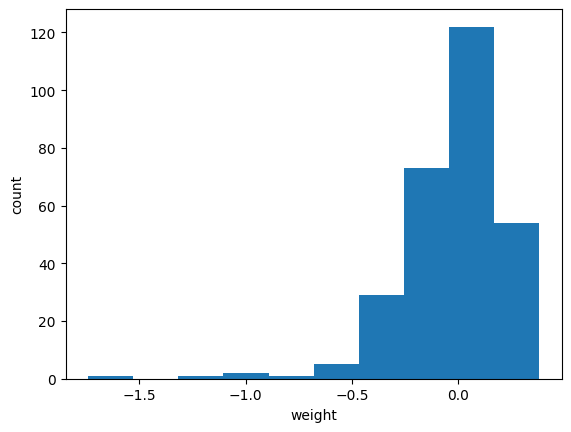

In [ ]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

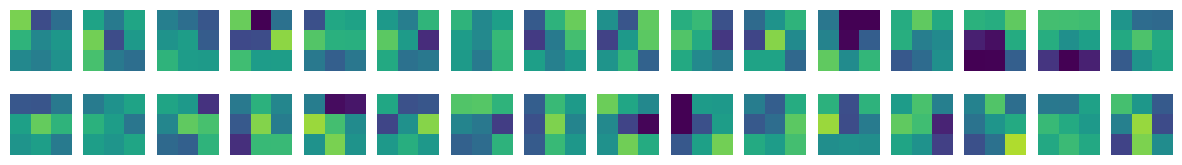

In [ ]:
fig,axs=plt.subplots(2,16,figsize=(15,2)) # 32개의 커널들을16*2로 하겠다
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5) # 0~1, 0~15 범위 가짐
     # vmin과 vmax파라미터로 픽셀의 최댓값과 최솟값을 지정해 컬러맵으로 표현할 범위 지정ㅋ
    axs[i,j].axis('off')
plt.show()

###미훈련 합성곱 신경망 만들기

In [ ]:
no_training_model=keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation =\
                                          'relu',padding='same',input_shape=(28,28,1)))

In [ ]:
no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights.mean(),no_training_weights.std()) # mean : 평균, std : 표준편차

-0.0049950974 0.08427


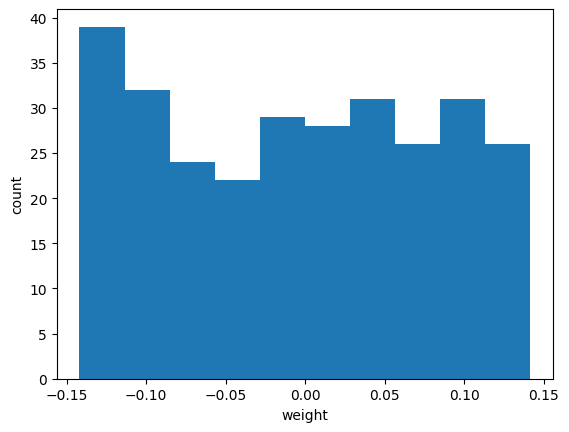

In [ ]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show() # 텐서플로가 신경망의 가중치 균등 분포해서 랜덤하게 값을 선택했음

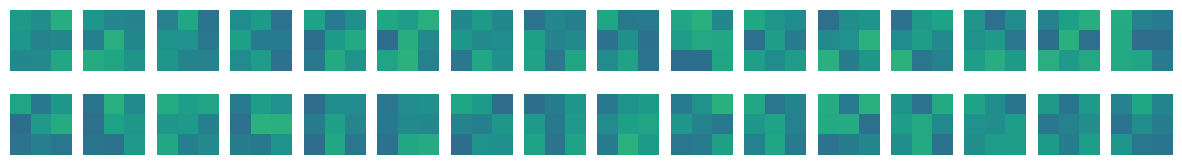

In [ ]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

###함수형 API
 * 지금까지는 신경망 모델 만들 때 Sequential클래스 사용함
 * Sequential은 딥러닝에는 좀 더 복잡한 모델이 많아 이런 경우엔 쓰기 어려움
 * 그래서 함수형 API를 사용한다

### 시퀀셜과 함수형 API의 차이
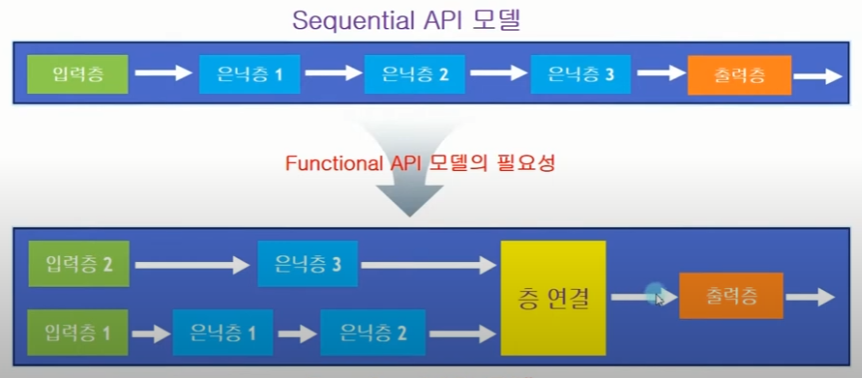

In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [ ]:
conv_acti=keras.Model(model.input,model.layers[0].output)

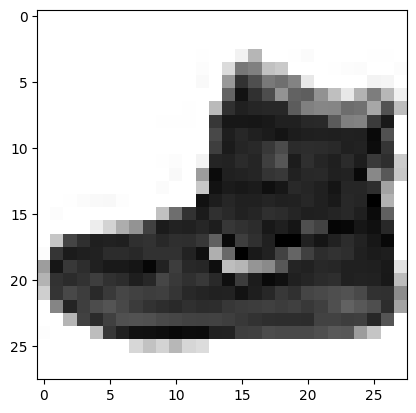

In [ ]:
(train_input,train_target),(test_input,test_target) =\
  keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [ ]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255
feature_maps=conv_acti.predict(inputs)

1/1 [==============================] - 0s 450ms/step


In [ ]:
print(feature_maps.shape)

(1, 28, 28, 32)


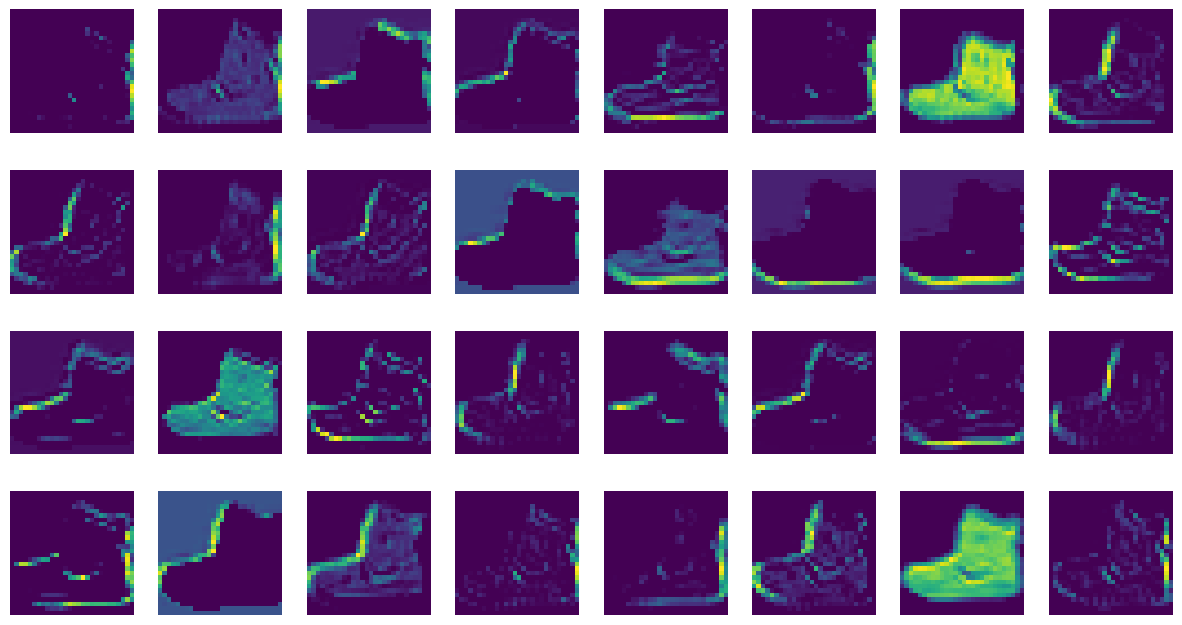

In [ ]:
fig,axs=plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()
 # 어떤 부분이 크게 활성화되었는지 파악이 가능함

In [ ]:
conv2_acti=keras.Model(model.input,model.layers[2].output)

In [ ]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255
feature_maps=conv2_acti.predict(inputs)

1/1 [==============================] - 0s 294ms/step


In [ ]:
print(feature_maps.shape)

(1, 14, 14, 64)


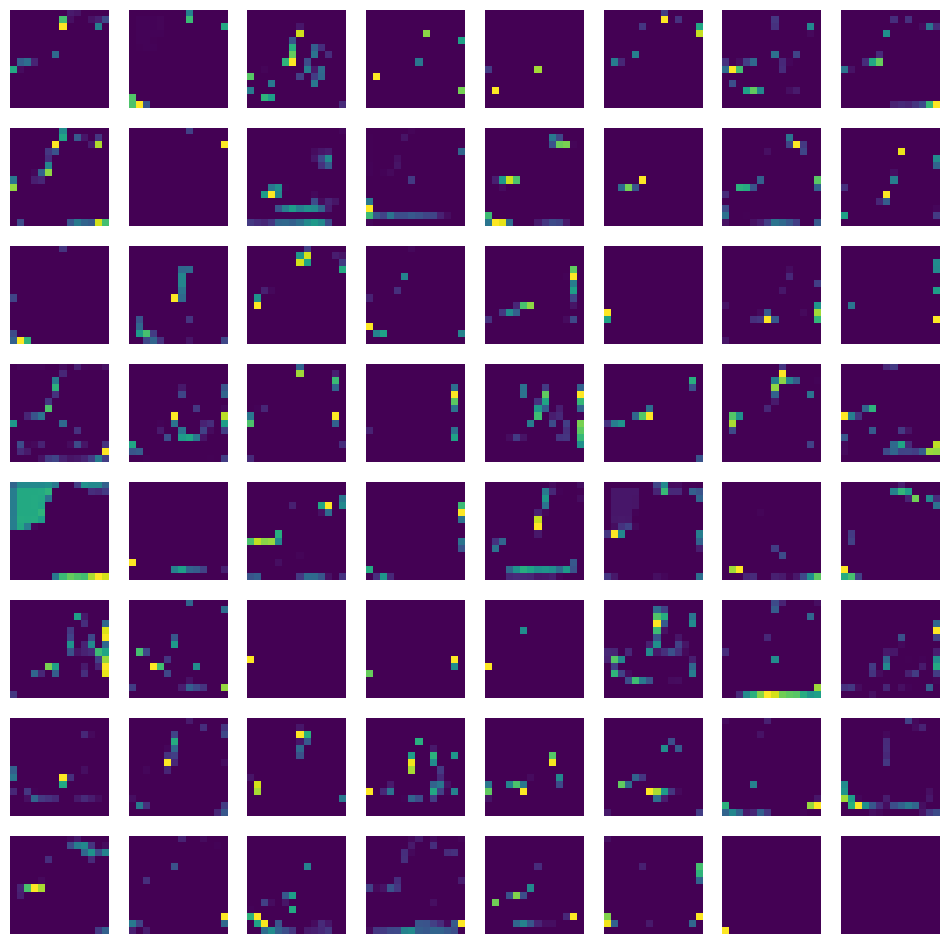

In [ ]:
fig,axs=plt.subplots(8,8,figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()
 # 앞에서 감지한 시각정보를 바탕으로 추상적 정보를 학습